In [249]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

#xgboost
import xgboost as xgb

#lightgbm
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score
import numpy as np

import matplotlib.pyplot as plt

In [137]:
train = pd.read_excel('아버지아들키.xlsx', sheet_name='train')
test = pd.read_excel('아버지아들키.xlsx', sheet_name='test')

- voting System

In [138]:
#결과값을 보니 softvoting이 필요해 보임-연속형변수이기 때문에
train.head()

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068


In [139]:
#이미 나누어져 있어서 train_test_split 사용하지 말고 손수 나누어주어야 함
X_train = train["Father"]
y_train = train["Son"]

X_test = test["Father"]
y_test = test["Son"]

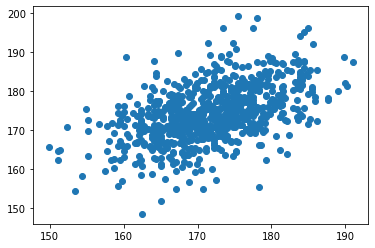

In [140]:
#결과값이 애매하지만 완전 선형은 아닌 것으로 보임
plt.scatter(X_train, y_train)

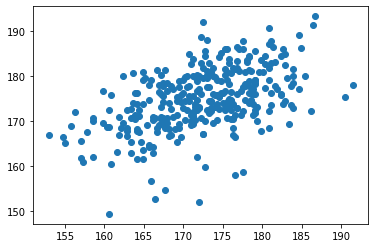

In [141]:
#train과 비슷한 모양을 하고 있는 것으로 보아 예측은 잘 되어질 것이라고 판단 됨
plt.scatter(X_test, y_test)

In [142]:
#이 경우에는모델 선언 전에 해주어야 할 작업
# 2차원 행렬을 요구-series는 1차원?
#1차원 행렬로 바꾸어주고 2차원 행렬로 변화는 과정이 요구됨?
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

In [157]:
#모델 만들기
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=50)
model3 = DecisionTreeRegressor()

In [158]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

DecisionTreeRegressor()

In [159]:
#같은 데이터를 모델별로 예측을 시킴
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

In [129]:
print(len(X_test))
print(len(predict1))
print(len(predict2))
print(len(predict3))

323
323
323
323


In [160]:
#각각의 predict의 성적을 뽑아보자
print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("의사결정나무 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2434867959852367
의사결정나무 모델 성능:  0.07133438875422093


In [131]:
#test->train으로 변화해서 살펴보기
#의사결정나무 모델은 과대 적합이라는 것을 알 수 있다. train=0.07 test=0.37
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)

print("선형회귀 모델 성능: ", r2_score(y_train, predict1))
print("KNN 모델 성능: ", r2_score(y_train, predict2))
print("의사결정나무 모델 성능: ", r2_score(y_train, predict3))

선형회귀 모델 성능:  0.24967004992776776
KNN 모델 성능:  0.25976336092517505
의사결정나무 모델 성능:  0.37981060494153207


In [161]:
#그냥 평균
avg_predict = (predict1 + predict2 + predict3)/3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.22896318302324248


In [162]:
#가중 평균-의사결정모델이 사용되고 있는 것으로 추정됨?
avg_predict = ((24*predict1) + (25*predict2) + (7*predict3))/56
print("가중 평균 성능: ", r2_score(y_test, avg_predict))

가중 평균 성능:  0.24710058485557873


In [163]:
#분산 확인
print(np.cov(predict1))
print(np.cov(predict2))
print(np.cov(predict3))

#평균을 낸 predict는 분산이 감소해야함? -> 확인
print(np.cov(avg_predict))

13.020016090787738
11.681305648013176
18.70637762177803
12.09708088056144


- 랜덤포레스트

In [151]:
#모델 만들기
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=50)
model3 = RandomForestRegressor()

In [152]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

RandomForestRegressor()

In [153]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("랜덤포레스트 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2434867959852367
랜덤포레스트 모델 성능:  0.11322487299411943


In [ ]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)

print("선형회귀 모델 성능: ", r2_score(y_train, predict1))
print("KNN 모델 성능: ", r2_score(y_train, predict2))
print("랜덤포레스트 모델 성능: ", r2_score(y_train, predict3))

선형회귀 모델 성능:  0.24967004992776776
KNN 모델 성능:  0.25976336092517505
랜덤포레스트 모델 성능:  0.37293694143951317


In [154]:
#그냥 평균
avg_predict = (predict1 + predict2 + predict3)/3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.23236032245170768


In [155]:
#가중 평균-의사결정모델이 사용되고 있는 것으로 추정됨?
avg_predict = ((24*predict1) + (25*predict2) + (7*predict3))/56
print("가중 평균 성능: ", r2_score(y_test, avg_predict))

가중 평균 성능:  0.2471361778633423


In [156]:
#분산 확인
print(np.cov(predict1))
print(np.cov(predict2))
print(np.cov(predict3))

#평균을 낸 predict는 분산이 감소해야함? -> 확인
print(np.cov(avg_predict))

13.020016090787738
11.681305648013176
16.69124642708401
12.095560846402089


- 부스팅

In [189]:
#모델 만들기
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=50)
model3 = GradientBoostingRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

GradientBoostingRegressor()

In [185]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))

#결과값 랜덤포레스트보다 나음
print("그래디언트 부스팅 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2434867959852367
그래디언트 부스팅 모델 성능:  0.18554360914749402


In [190]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)

print("선형회귀 모델 성능: ", r2_score(y_train, predict1))
print("KNN 모델 성능: ", r2_score(y_train, predict2))
print("그래디언트 부스팅 모델 성능: ", r2_score(y_train, predict3))

선형회귀 모델 성능:  0.24967004992776776
KNN 모델 성능:  0.25976336092517505
그래디언트 부스팅 모델 성능:  0.3461783635279715


In [186]:
#그냥 평균
avg_predict = (predict1 + predict2 + predict3)/3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.2397909451877327


In [187]:
#가중 평균-의사결정모델이 사용되고 있는 것으로 추정됨?
avg_predict = ((24*predict1) + (25*predict2) + (7*predict3))/56
print("가중 평균 성능: ", r2_score(y_test, avg_predict))

가중 평균 성능:  0.24797451813768212


In [188]:
#분산 확인
print(np.cov(predict1))
print(np.cov(predict2))
print(np.cov(predict3))

#평균을 낸 predict는 분산이 감소해야함? -> 확인
print(np.cov(avg_predict))

13.020016090787738
11.681305648013176
13.56848250600568
12.102062280885788


In [193]:
#!pip install xgboost
#!pip install lightgbm

In [219]:
#모델 만들기
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=50)
#HP가 다양함?
model3 = xgb.XGBRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [218]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))

print("XG부스팅 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2434867959852367
XG부스팅 모델 성능:  0.07841681998519068


In [220]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)

print("선형회귀 모델 성능: ", r2_score(y_train, predict1))
print("KNN 모델 성능: ", r2_score(y_train, predict2))
print("XG부스팅 모델 성능: ", r2_score(y_train, predict3))

선형회귀 모델 성능:  0.24967004992776776
KNN 모델 성능:  0.25976336092517505
XG부스팅 모델 성능:  0.3797250879130013


In [210]:
#그냥 평균
avg_predict = (predict1 + predict2 + predict3)/3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.22950035573173955


In [211]:
#가중 평균-의사결정모델이 사용되고 있는 것으로 추정됨?
avg_predict = ((24*predict1) + (25*predict2) + (7*predict3))/56
print("가중 평균 성능: ", r2_score(y_test, avg_predict))

가중 평균 성능:  0.2470821397918057


In [212]:
#분산 확인
print(np.cov(predict1))
print(np.cov(predict2))
print(np.cov(predict3))

#평균을 낸 predict는 분산이 감소해야함? -> 확인
print(np.cov(avg_predict))

13.020016090787738
11.681305648013176
17.459261693935858
11.986145857058201


- lightGBM

In [228]:
#모델 만들기
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=50)
#HP가 다양함?
model3 = LGBMRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

LGBMRegressor()

In [224]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))

print("lightGBM 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2434867959852367
lightGBM 모델 성능:  0.18113480901854329


In [229]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)

print("선형회귀 모델 성능: ", r2_score(y_train, predict1))
print("KNN 모델 성능: ", r2_score(y_train, predict2))
print("lightGBM 모델 성능: ", r2_score(y_train, predict3))

선형회귀 모델 성능:  0.24967004992776776
KNN 모델 성능:  0.25976336092517505
lightGBM 모델 성능:  0.3223498779779298


In [225]:
#그냥 평균
avg_predict = (predict1 + predict2 + predict3)/3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.23805727653909858


In [226]:
#가중 평균-의사결정모델이 사용되고 있는 것으로 추정됨?
avg_predict = ((24*predict1) + (25*predict2) + (7*predict3))/56
print("가중 평균 성능: ", r2_score(y_test, avg_predict))

가중 평균 성능:  0.24729161308281378


In [227]:
#분산 확인
print(np.cov(predict1))
print(np.cov(predict2))
print(np.cov(predict3))

#평균을 낸 predict는 분산이 감소해야함? -> 확인
print(np.cov(avg_predict))

13.020016090787738
11.681305648013176
14.05993019027245
12.170544411846839


##### 모델들의 성능을 비교하는 bar그래프 표현
- 선형회귀
- kNN
- 의사결정나무
- 그래디언트 부스팅
- xg부스팅
- lightgbm

In [260]:
#모델 만들기
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=50)
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor()
model5= GradientBoostingRegressor()
model6=model3 = xgb.XGBRegressor()
model7=LGBMRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

LGBMRegressor()

In [261]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)

In [257]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)
predict4 = model4.predict(X_train)
predict5 = model5.predict(X_train)
predict6 = model6.predict(X_train)
predict7 = model7.predict(X_train)

In [258]:
print("선형회귀 모델 성능: ", r2_score(y_train, predict1))
print("KNN 모델 성능: ", r2_score(y_train, predict2))
print("의사결정나무 모델 성능: ", r2_score(y_train, predict3))
print("RF 모델 성능: ", r2_score(y_train, predict4))
print("그래디언트 모델 성능: ", r2_score(y_train, predict5))
print("xg부스팅 모델 성능: ", r2_score(y_train, predict6))
print("lightGBM 모델 성능: ", r2_score(y_train, predict7))

선형회귀 모델 성능:  0.24967004992776776
KNN 모델 성능:  0.25976336092517505
의사결정나무 모델 성능:  0.3797250879130013
RF 모델 성능:  0.3727183870452947
그래디언트 모델 성능:  0.3461783635279715
xg부스팅 모델 성능:  0.3797250879130013
lightGBM 모델 성능:  0.3223498779779298


In [262]:
print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("의사결정나무 모델 성능: ", r2_score(y_test, predict3))
print("RF 모델 성능: ", r2_score(y_test, predict4))
print("그래디언트 모델 성능: ", r2_score(y_test, predict5))
print("xg부스팅 모델 성능: ", r2_score(y_test, predict6))
print("lightGBM 모델 성능: ", r2_score(y_test, predict7))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2434867959852367
의사결정나무 모델 성능:  0.07841681998519068
RF 모델 성능:  0.11330702743212939
그래디언트 모델 성능:  0.18554360914749402
xg부스팅 모델 성능:  0.07841681998519068
lightGBM 모델 성능:  0.18113480901854329


<BarContainer object of 7 artists>

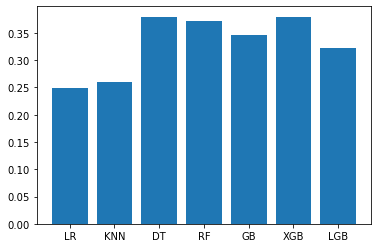

In [259]:
model_name=["LR", "KNN", "DT", "RF", "GB","XGB","LGB"]
scores = [r2_score(y_train, predict1), r2_score(y_train, predict2)
        , r2_score(y_train, predict3), r2_score(y_train, predict4)
        ,r2_score(y_train, predict5), r2_score(y_train, predict6)
        ,r2_score(y_train, predict7)]
plt.bar(model_name, scores)

<BarContainer object of 7 artists>

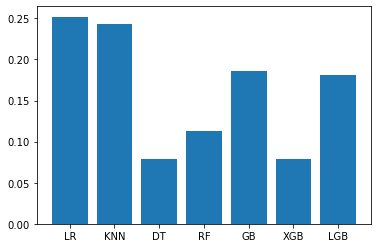

In [263]:
model_name=["LR", "KNN", "DT", "RF", "GB","XGB","LGB"]
scores = [r2_score(y_test, predict1), r2_score(y_test, predict2)
        , r2_score(y_test, predict3), r2_score(y_test, predict4)
        ,r2_score(y_test, predict5), r2_score(y_test, predict6)
        ,r2_score(y_test, predict7)]
plt.bar(model_name, scores)
